# <center>Data Mining Project<center>
<center>Group 7<center>


## Overview
The data collected is about customers' information of a bank, which mainly is the amount in their transactions and their loan group. The data is used for training and validating before using the test data to test.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [2]:
df = pd.read_csv('dataset.csv')

Vì cần xem xét các nhóm nợ, loại bỏ các giá trị np.nan

In [3]:
df = df.dropna(subset = ['nhomno_xhtdJuin2021'])

Thay thế cột năm sinh bằng tuổi của khách hàng (tính đến năm 2020)

In [4]:
df['age'] = 2020 - df.birth_incorp_date

Dữ liệu về địa chỉ không cần thiết cho việc phân tích nhóm nợ do các số liệu ở dạng category và có số lượng rất lớn. <br>
Dữ liệu để train data chỉ thu thập đến hết 31/12/2020, sử dụng thêm dữ liệu tháng 3 để tham chiếu và cột 'nhomno_xhtdJuin2021' để làm biến phụ thuộc. <br>
--> Xoá bỏ những cột không cần thiết, giữ lại những cột khác được tổng hợp để trở thành dataframe như sau:

In [5]:
df = pd.concat([df.iloc[:, [35, 0, 1, 50]], df.iloc[:, 6:31], df.nhomno_xhtdJuin2021], axis = 1)
df = df.set_index('rd_id')

- **Rename columns**

In [6]:
df.rename(columns = lambda x: x.strip(), inplace = True)
df.rename(columns = {"local_ref_1": 'gender', "vn_marital_status": 'marital_status'}, inplace = True)
df

,gender,marital_status,age,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,most_act_mar2021,total_act_mar2021,total_amt_mar2021,nhomno_xhtdJuin2021
rd_id,,,,,,,,,,,,,,,,,,,,,
1570544787,MALE,Single,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.103180e-04,0,0,2,5,NaN,NaN,NaN,NaN,1.0
1689551331,MALE,Married,28.0,0.0,0.000476,0.000011,0.0,0.0,1.0,11.0,...,5.920000e-07,1,2,3,141,69.0,Giao dich chuyen khoan,71.0,0.001015,1.0
498001800,MALE,Married,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.870000e-07,1,2,3,32,14.0,Giao dich chuyen khoan,21.0,0.000020,1.0
1519332095,MALE,Single,24.0,0.0,0.000014,0.000079,0.0,0.0,1.0,1.0,...,5.920000e-07,1,6,3,20,3.0,Giao dich chuyen khoan,4.0,0.000012,1.0
1291881657,MALE,Married,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.957880e-04,0,0,2,3,1.0,GIAO DICH PHI TAI CHINH,2.0,0.000322,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675691605,MALE,Single,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.550000e-05,0,0,1,6,13.0,Giao dich chuyen khoan,14.0,0.000122,1.0
1417761924,FEMALE,Married,28.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,...,2.960000e-06,0,0,3,12,8.0,Giao dich chuyen khoan,15.0,0.000063,1.0
1353717729,MALE,Single,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,1,2,13.0,Giao dich chuyen khoan,14.0,0.000398,1.0


----

## 1. Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

### 1.1. Detecting Missing Data

Text(0.925, 0.5, 'Yellow represents missing values.\n\nPurple represents existing values.')

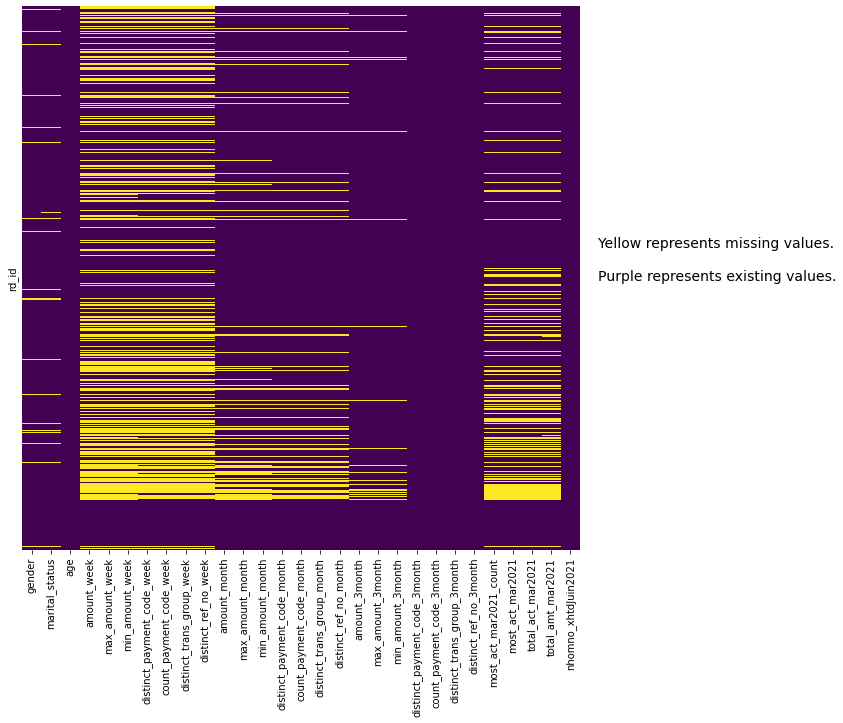

In [23]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax = ax)

plt.gcf().text(0.925, 0.5, 'Yellow represents missing values.\n\nPurple represents existing values.', fontsize=14)

In [24]:
missing_data = df.isnull()

i = 0
for column in missing_data.columns.values.tolist():
    print('{}. "{}": {:.2%} missing values'.format(i, column, (len(df) - missing_data[column].value_counts()[False])/len(df)))
    i += 1

0. "gender": 3.29% missing values
1. "marital_status": 3.59% missing values
2. "age": 0.00% missing values
3. "amount_week": 35.82% missing values
4. "max_amount_week": 35.82% missing values
5. "min_amount_week": 35.82% missing values
6. "distinct_payment_code_week": 34.57% missing values
7. "count_payment_code_week": 34.57% missing values
8. "distinct_trans_group_week": 34.57% missing values
9. "distinct_ref_no_week": 34.57% missing values
10. "amount_month": 13.72% missing values
11. "max_amount_month": 13.72% missing values
12. "min_amount_month": 13.72% missing values
13. "distinct_payment_code_month": 11.58% missing values
14. "count_payment_code_month": 11.58% missing values
15. "distinct_trans_group_month": 11.58% missing values
16. "distinct_ref_no_month": 11.58% missing values
17. "amount_3month": 3.49% missing values
18. "max_amount_3month": 3.49% missing values
19. "min_amount_3month": 3.49% missing values
20. "distinct_payment_code_3month": 0.00% missing values
21. "count_p

### 1.2. Remove outliers and filling missing values

#### 1.2.1. 'age' column

Người cao tuổi nhất tính đến năm 2020 là 117 tuổi <br>
--> Loại bỏ các outliers của cột age (< 117 tuổi)

<AxesSubplot:ylabel='age'>

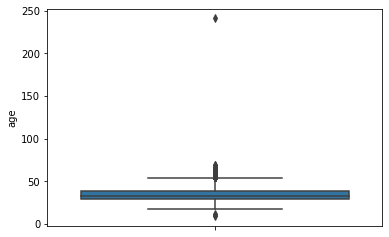

In [25]:
sns.boxplot(y = 'age', data = df)

Người cao tuổi nhất tính đến năm 2020 là 117 tuổi <br>
--> Loại bỏ các outliers của cột age (< 117 tuổi)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

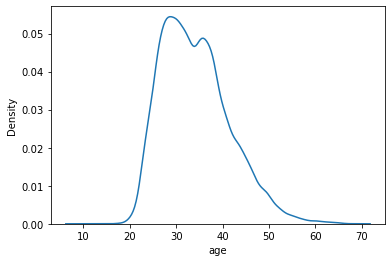

In [26]:
sns.distplot(df.age[df.age < 117], hist = False)

Vì data is not symmetrically distributed, thay thế các missing values ở cột 'age' bằng **median** thay vì mean

In [7]:
df.age = df.age.fillna(df.age.median())

#### 1.2.2. 'gender' column

In [8]:
df.gender.isnull().value_counts()

False    28969
True       987
Name: gender, dtype: int64

In [29]:
df.gender.value_counts()

MALE      20620
FEMALE     8349
Name: gender, dtype: int64

Có 987 người chưa có thông tin về giới tính, đa số các khách hàng là nam (chiếm 71%). <br> 
--> Thay thế 987 người này bằng "MALE"

In [9]:
df.gender = df.gender.fillna('MALE')

#### 1.2.3. 'marital_status' column

In [31]:
df.marital_status.isnull().value_counts()

False    28882
True      1074
Name: marital_status, dtype: int64

In [32]:
df.marital_status.value_counts()

Married      17900
Single       10809
Other          125
Divorced        24
Partner         17
Widow            6
Seperated        1
Name: marital_status, dtype: int64

Có 1074 người chưa có thông tin về tình trạng hôn nhân, đa số các khách hàng đã kết hôn (chiếm 62%). <br> 
--> Thay thế tình trạng hôn nhân 1074 người này bằng "Married"

In [10]:
df.marital_status = df.marital_status.fillna('Married')

#### 1.2.4. Những cột có dữ liệu null khác

Điền vào toàn bộ những cột còn lại giá trị 0 thay cho np.nan, coi những khách hàng không giao dịch hay không sử dụng dịch vụ sẽ coi số lượng bằng 0.

In [11]:
df = df.replace(np.nan, 0)

**Cuối cùng, dữ liệu sau khi làm sạch:**

Text(0.925, 0.5, 'Yellow represents missing values.\n\nPurple represents existing values.')

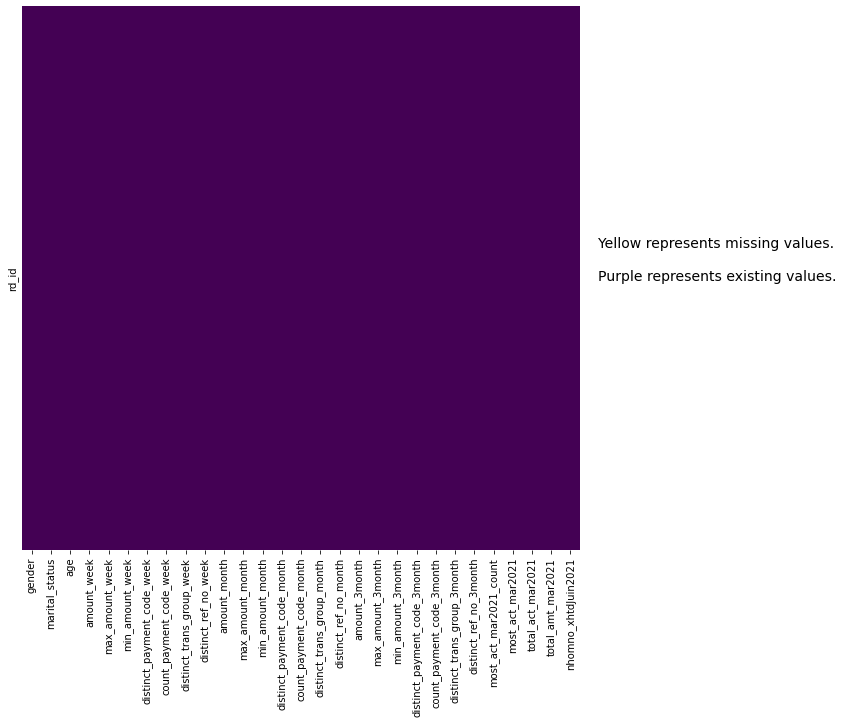

In [35]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax = ax)

plt.gcf().text(0.925, 0.5, 'Yellow represents missing values.\n\nPurple represents existing values.', fontsize=14)

#### 1.2.5. Correct data types

In [12]:
def category(*argv):
    for arg in argv:
        df[arg] = df[arg].astype('category')

category("gender", "marital_status")
        
def int64type(*argv):
    for arg in argv:
        df[arg] = df[arg].astype('int64')

int64type("distinct_payment_code_week", "count_payment_code_week", "distinct_trans_group_week", "distinct_ref_no_week")
int64type('distinct_payment_code_month', 'count_payment_code_month', 'distinct_trans_group_month', 'distinct_ref_no_month')
int64type('distinct_payment_code_3month', 'count_payment_code_3month', 'distinct_trans_group_3month', 'distinct_ref_no_3month')
int64type('most_act_mar2021_count', 'total_act_mar2021', 'age')
int64type('nhomno_xhtdJuin2021')

def floattype(*argv):
    for arg in argv:
        df[arg] = df[arg].astype('float')

floattype("amount_week", "max_amount_week", "min_amount_week", 'amount_month', 'max_amount_month', 'min_amount_month')
floattype('amount_3month', 'max_amount_3month','min_amount_3month', 'total_amt_mar2021')

df.dtypes

gender                          category
marital_status                  category
age                                int64
amount_week                      float64
max_amount_week                  float64
min_amount_week                  float64
distinct_payment_code_week         int64
count_payment_code_week            int64
distinct_trans_group_week          int64
distinct_ref_no_week               int64
amount_month                     float64
max_amount_month                 float64
min_amount_month                 float64
distinct_payment_code_month        int64
count_payment_code_month           int64
distinct_trans_group_month         int64
distinct_ref_no_month              int64
amount_3month                    float64
max_amount_3month                float64
min_amount_3month                float64
distinct_payment_code_3month       int64
count_payment_code_3month          int64
distinct_trans_group_3month        int64
distinct_ref_no_3month             int64
most_act_mar2021

In [37]:
df.nhomno_xhtdJuin2021.value_counts()

1    15831
2     8465
3     2678
4     2380
5      602
Name: nhomno_xhtdJuin2021, dtype: int64

### 1.3. Normalization

In [13]:
def normalize(*cols):
    for col in cols:
        df[col] = df[col] / df[col].max()

normalize('amount_week', 'max_amount_week', 'min_amount_week', 'amount_month', 'max_amount_month', 'min_amount_month')
normalize('amount_3month', 'max_amount_3month', 'min_amount_3month', 'total_amt_mar2021')

In [14]:
df

,gender,marital_status,age,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,most_act_mar2021,total_act_mar2021,total_amt_mar2021,nhomno_xhtdJuin2021
rd_id,,,,,,,,,,,,,,,,,,,,,
1570544787,MALE,Single,34,0.0,0.00000,0.000000,0,0,0,0,...,0.000617,0,0,2,5,0,0,0,0.000000,1
1689551331,MALE,Married,28,0.0,0.00233,0.000090,0,0,1,11,...,0.000003,1,2,3,141,69,Giao dich chuyen khoan,71,0.001015,1
498001800,MALE,Married,33,0.0,0.00000,0.000000,0,0,0,0,...,0.000005,1,2,3,32,14,Giao dich chuyen khoan,21,0.000020,1
1519332095,MALE,Single,24,0.0,0.00007,0.000627,0,0,1,1,...,0.000003,1,6,3,20,3,Giao dich chuyen khoan,4,0.000012,1
1291881657,MALE,Married,47,0.0,0.00000,0.000000,0,0,0,0,...,0.001655,0,0,2,3,1,GIAO DICH PHI TAI CHINH,2,0.000322,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675691605,MALE,Single,32,0.0,0.00000,0.000000,0,0,0,0,...,0.000199,0,0,1,6,13,Giao dich chuyen khoan,14,0.000122,1
1417761924,FEMALE,Married,28,0.0,0.00000,0.000000,0,0,1,1,...,0.000017,0,0,3,12,8,Giao dich chuyen khoan,15,0.000063,1
1353717729,MALE,Single,29,0.0,0.00000,0.000000,0,0,0,0,...,0.000000,0,0,1,2,13,Giao dich chuyen khoan,14,0.000398,1


----

### 2. Analysis

Trước hết, chọn ra các cột để sử dụng cho việc huấn luyện mô hình (hết năm 2020) để dự đoán nhóm nợ vào tháng 6 năm 2021. <br>
*(không xét đến dữ liệu tháng 3)*

#### 2.1. Variables

In [29]:
core = pd.concat([df.iloc[:,3:24], df.iloc[:, -1]], axis = 1)
core

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,...,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,nhomno_xhtdJuin2021
rd_id,,,,,,,,,,,,,,,,,,,,,
1570544787,0.0,0.00000,0.000000,0,0,0,0,0.000038,0.000489,0.001134,...,1,1,0.000036,0.000233,0.000617,0,0,2,5,1
1689551331,0.0,0.00233,0.000090,0,0,1,11,0.000922,0.002000,0.000017,...,1,48,0.000903,0.001021,0.000003,1,2,3,141,1
498001800,0.0,0.00000,0.000000,0,0,0,0,0.000062,0.000071,0.000017,...,2,23,0.000073,0.000989,0.000005,1,2,3,32,1
1519332095,0.0,0.00007,0.000627,0,0,1,1,0.000021,0.000057,0.000017,...,3,10,0.000018,0.000088,0.000003,1,6,3,20,1
1291881657,0.0,0.00000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,...,0,0,0.000242,0.003744,0.001655,0,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675691605,0.0,0.00000,0.000000,0,0,0,0,0.000108,0.000714,0.000199,...,1,6,0.000034,0.000340,0.000199,0,0,1,6,1
1417761924,0.0,0.00000,0.000000,0,0,1,1,0.000022,0.000149,0.000017,...,2,8,0.000017,0.000159,0.000017,0,0,3,12,1
1353717729,0.0,0.00000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,...,0,0,0.000000,0.000000,0.000000,0,0,1,2,1


Tạo biến dummy cho categorical variables

In [14]:
core = pd.get_dummies(data = core, columns = ["gender", 'marital_status'], drop_first = True)

#### 2.2. Mô hình dự đoán khả năng chi trả tín dụng (Logistic Regression Model)

In [30]:
data_credible = core
data_credible['credible_group'] = np.where(data_credible["nhomno_xhtdJuin2021"].isin([1]), 1, 0)
data_credible = data_credible.drop(['nhomno_xhtdJuin2021'], axis = 1)

In [32]:
data_credible

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,...,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,credible_group
rd_id,,,,,,,,,,,,,,,,,,,,,
1570544787,0.0,0.00000,0.000000,0,0,0,0,0.000038,0.000489,0.001134,...,1,1,0.000036,0.000233,0.000617,0,0,2,5,1
1689551331,0.0,0.00233,0.000090,0,0,1,11,0.000922,0.002000,0.000017,...,1,48,0.000903,0.001021,0.000003,1,2,3,141,1
498001800,0.0,0.00000,0.000000,0,0,0,0,0.000062,0.000071,0.000017,...,2,23,0.000073,0.000989,0.000005,1,2,3,32,1
1519332095,0.0,0.00007,0.000627,0,0,1,1,0.000021,0.000057,0.000017,...,3,10,0.000018,0.000088,0.000003,1,6,3,20,1
1291881657,0.0,0.00000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,...,0,0,0.000242,0.003744,0.001655,0,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675691605,0.0,0.00000,0.000000,0,0,0,0,0.000108,0.000714,0.000199,...,1,6,0.000034,0.000340,0.000199,0,0,1,6,1
1417761924,0.0,0.00000,0.000000,0,0,1,1,0.000022,0.000149,0.000017,...,2,8,0.000017,0.000159,0.000017,0,0,3,12,1
1353717729,0.0,0.00000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,...,0,0,0.000000,0.000000,0.000000,0,0,1,2,1


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train_credible, X_test_credible, y_train_credible, y_test_credible = train_test_split(data_credible.drop('credible_group', axis = 1),
                                                                                        data_credible['credible_group'], test_size = 0.2,
                                                                                        random_state = 101)

- **Grid Search for the hyperparameters in Logistic Regression Model**

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel_test = LogisticRegression()

We create a dictionary of parameter values:

In [47]:
logit_hyper_values = [    
    {'C' : [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

In [48]:
find_logit_hyper = GridSearchCV(logmodel_test, param_grid = logit_hyper_values, cv = 4, verbose = True, n_jobs = -1)

In [49]:
find_best_logit_hyper = find_logit_hyper.fit(data_credible.drop('credible_group', axis = 1), data_credible['credible_group'])

Fitting 4 folds for each of 160 candidates, totalling 640 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [50]:
best_logit_hyper = find_best_logit_hyper.best_estimator_
best_logit_hyper

LogisticRegression(C=1000, solver='newton-cg')

- **Training and Predicting**

In [60]:
logmodel_credible = LogisticRegression(C = 1000, solver = 'newton-cg', class_weight = 'balanced')

logmodel_credible.fit(X_train_credible, y_train_credible)

LogisticRegression(C=1000, class_weight='balanced', solver='newton-cg')

In [61]:
yhat_credible_lr = logmodel_credible.predict(X_test_credible)

In [62]:
yhat_credible_lr[:5]

array([0, 0, 0, 0, 0])

In [63]:
logmodel_credible.coef_

array([[ 1.88898905e-02, -9.48224744e+00, -1.16158130e+01,
         1.97636198e+00, -1.40106630e-01, -1.21873394e-01,
         2.48895133e-01,  4.03611456e-02,  2.13820974e+01,
        -2.67661247e+00,  8.10542498e+00,  1.88294204e-01,
         1.88031847e-02,  2.75273497e-01, -2.70820582e-03,
        -1.79852460e+01,  5.51960129e+01, -1.43280126e+01,
         3.87293592e-02, -1.00420290e-02,  9.14104962e-02,
        -5.03156914e-03, -6.33353404e-01, -1.21268359e+00,
        -1.71042711e+00, -2.04607280e+00,  1.40181116e+00,
        -1.25613712e+00, -1.23944998e+00]])

- **Evaluation**

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [65]:
confusion_matrix(y_test_credible, yhat_credible_lr)

array([[2085,  748],
       [1268, 1891]], dtype=int64)

In [66]:
print(classification_report(y_test_credible, yhat_credible_lr))

              precision    recall  f1-score   support

           0       0.62      0.74      0.67      2833
           1       0.72      0.60      0.65      3159

    accuracy                           0.66      5992
   macro avg       0.67      0.67      0.66      5992
weighted avg       0.67      0.66      0.66      5992



In [58]:
logmodel_credible.score(X_test_credible, y_test_credible)

0.650200267022697

- **ROC curve**

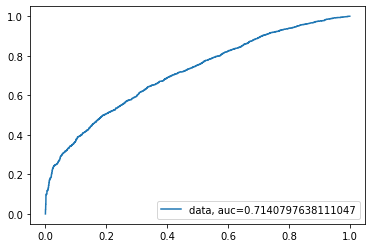

In [59]:
y_pred_proba = logmodel_credible.predict_proba(X_test_credible)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_credible,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_credible, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### 3.3. Stratified K-Fold Cross-Validation

In [19]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [96]:
stratified_kf = StratifiedKFold(n_splits = 5)
cvs_score = cross_val_score(logmodel_credible, data_credible.drop('credible_group', axis = 1), data_credible['credible_group'], cv = stratified_kf)
print('Cross Validation Scores are {}'.format(cvs_score))
print('Average Cross Validation score: {}'.format(cvs_score.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validation Scores are [0.54105474 0.57719913 0.57703221 0.62894342 0.75112669]
Average Cross Validation score: 0.6150712383662276


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 3.4. K Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Optimal k: 1


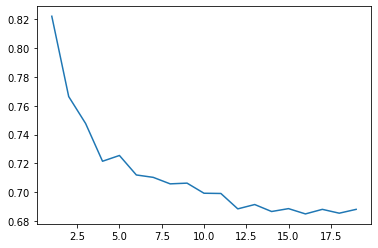

In [98]:
accuracy_scores = {}

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2, algorithm = 'auto')
    knn.fit(X_train_credible, y_train_credible)
    yhat_credible_knn = knn.predict(X_test_credible)
    accuracy_scores[i] = accuracy_score(y_test_credible, yhat_credible_knn)

plt.plot(list(accuracy_scores.keys()), list(accuracy_scores.values()))
optimal_k = max(accuracy_scores.items(), key = lambda k : k[1])
print('Optimal k: {}'.format(optimal_k[0]))

In [99]:
clf = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2, algorithm = 'auto')
clf.fit(X_train_credible, y_train_credible)

KNeighborsClassifier(n_neighbors=1)

In [100]:
yhat_credible_knn = clf.predict(X_test_credible)

In [115]:
confusion_matrix(y_test_credible, yhat_credible_knn)

array([[2500,  333],
       [ 733, 2426]], dtype=int64)

In [101]:
print(classification_report(y_test_credible, yhat_credible_knn))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      2833
           1       0.88      0.77      0.82      3159

    accuracy                           0.82      5992
   macro avg       0.83      0.83      0.82      5992
weighted avg       0.83      0.82      0.82      5992



In [102]:
accuracy_score(y_test_credible, yhat_credible_knn)

0.8220961281708945

#### 3.5. Random Forest

- **Grid Search for the hyperparameters in Random Forest Model**

In [33]:
from sklearn.ensemble import RandomForestClassifier 

In [22]:
rfmodel_test = RandomForestClassifier()

We create a dictionary of parameter values:

In [35]:
rf_hyper_values = [    
    {'n_estimators' : [int(x) for x in np.linspace(50, 1050, num = 21)]}
]

In [36]:
find_rf_hyper = GridSearchCV(rfmodel_test, param_grid = rf_hyper_values, cv = 4, verbose = True, n_jobs = -1)

In [37]:
find_best_rf_hyper = find_rf_hyper.fit(data_credible.drop('credible_group', axis = 1), data_credible['credible_group'])

Fitting 4 folds for each of 21 candidates, totalling 84 fits


In [38]:
best_rf_hyper = find_best_rf_hyper.best_estimator_
best_rf_hyper

RandomForestClassifier(n_estimators=50)

In [116]:
RandomForestClassifier??

Optimal estimators: 1


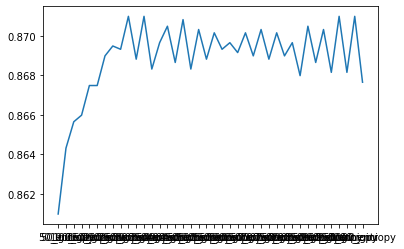

In [117]:
accuracy_scores_rf = {}

for i in range(50,1050,50):
    for cri in ['gini', 'entropy']:
        rfc = RandomForestClassifier(n_estimators = i, criterion = cri, random_state = 101)
        rfc.fit(X_train_credible, y_train_credible)
        yhat_credible_rfc = rfc.predict(X_test_credible)
        accuracy_scores_rf['{}_{}'.format(i, cri)] = accuracy_score(y_test_credible, yhat_credible_rfc)

plt.plot(list(accuracy_scores_rf.keys()), list(accuracy_scores_rf.values()))
optimal_es = max(accuracy_scores_rf.items(), key = lambda k : k[1])

In [118]:
print('Optimal estimators: {}'.format(optimal_es[0]))

Optimal estimators: 250_entropy


- **Train Model**

In [34]:
rf = RandomForestClassifier(n_estimators = 250, criterion = 'entropy' ,random_state = 101)

rf.fit(X_train_credible, y_train_credible)

RandomForestClassifier(criterion='entropy', n_estimators=250, random_state=101)

- **Prediction**

In [35]:
yhat_rf = rf.predict(X_test_credible)

In [60]:
yhat_rf[:5]

array([0, 0, 0, 0, 0])

In [121]:
confusion_matrix(y_test_credible, yhat_rf)

array([[2522,  311],
       [ 462, 2697]], dtype=int64)

In [122]:
print(classification_report(y_test_credible, yhat_rf))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2833
           1       0.90      0.85      0.87      3159

    accuracy                           0.87      5992
   macro avg       0.87      0.87      0.87      5992
weighted avg       0.87      0.87      0.87      5992



In [123]:
accuracy_score(y_test_credible, yhat_rf)

0.8709946595460614

array([0.00138737, 0.07556314, 0.04166185, 0.00493869, 0.00953469,
       0.01621954, 0.035212  , 0.08359646, 0.08433328, 0.05263492,
       0.01417249, 0.02456463, 0.03495129, 0.05927795, 0.10272614,
       0.09977115, 0.06621629, 0.01955731, 0.04251859, 0.0414669 ,
       0.08969532])

<AxesSubplot:ylabel='features'>

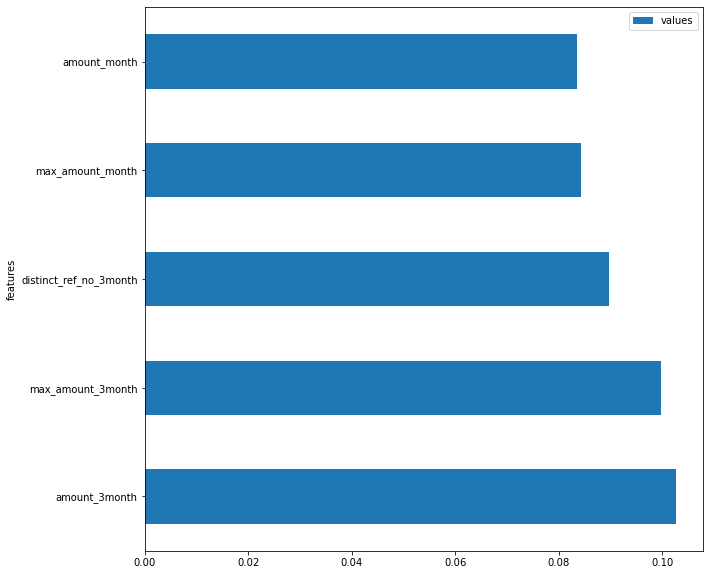

In [52]:
plt.rcParams["figure.figsize"] = (10,10)

new = pd.DataFrame({'features': X_test_credible.columns, 'values': rf.feature_importances_})
new = new.sort_values(by = 'values', ascending = False)
new.head().plot.barh(x = 'features', y = 'values', rot = 0)

In [ ]:
plt.barh(X_test_credible.columns, rf.feature_importances_)

In [35]:
!pip install shap

     |████████████████████████████████| 436 kB 537 kB/s eta 0:00:01


In [28]:
import shap

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_credible)

shap.summary_plot(shap_values, X_test_credible, plot_type="bar")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

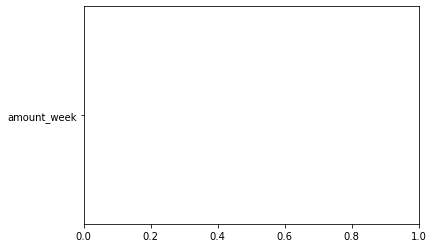

In [26]:
plt.barh(X_test_credible.columns, rf.feature_importances_)

#### 3.6. Ridge Regression

- **Grid Search for the hyperparameters in Ridge Regression Model**

In [45]:
from sklearn.linear_model import Ridge

In [46]:
model_test_ridge = Ridge()

We create a dictionary of parameter values:

In [47]:
alpha_value = [{'alpha' : [0.001, 0.01, 0.1, 1, 100, 1000, 10000, 100000]}]

In [48]:
find_alpha = GridSearchCV(model_test_ridge, alpha_value, cv = 4, verbose = True, n_jobs = -1)
# Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [49]:
find_best_alpha = find_alpha.fit(data_credible.drop('credible_group', axis = 1), data_credible['credible_group'])

Fitting 4 folds for each of 8 candidates, totalling 32 fits


In [50]:
best_alpha = find_best_alpha.best_estimator_
best_alpha

Ridge(alpha=0.01)

- **Ridge Regression**

In [51]:
RidgeModel = Ridge(alpha = 0.01)

RidgeModel.fit(X_train_credible, y_train_credible)

yhat_ridge = RidgeModel.predict(X_test_credible)

RidgeModel.score(X_test_credible, y_test_credible)

0.15692880108256857